# Descriptive statistics: project Erica
 
> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://demotu.org/)  
> Federal University of ABC, Brazil

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Helping-functions" data-toc-modified-id="Helping-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Helping functions</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Data-naming-convention" data-toc-modified-id="Data-naming-convention-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data naming convention</a></span></li></ul></li><li><span><a href="#Description" data-toc-modified-id="Description-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Description</a></span><ul class="toc-item"><li><span><a href="#Number-of-subjects-per-group" data-toc-modified-id="Number-of-subjects-per-group-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Number of subjects per group</a></span></li><li><span><a href="#Number-of-subjects-per-group-and-assessment" data-toc-modified-id="Number-of-subjects-per-group-and-assessment-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Number of subjects per group and assessment</a></span></li><li><span><a href="#Number-of-trials-per-subject" data-toc-modified-id="Number-of-trials-per-subject-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Number of trials per subject</a></span></li></ul></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data visualization</a></span></li></ul></div>

## Python setup

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
from pyversions import versions
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1.5})
palette = sns.color_palette(palette='Set1')  # tab10
sns.set_palette(palette=palette)
sns.set_style("darkgrid")
pd.set_option('precision', 3)

%load_ext autoreload
%autoreload 2

versions();

Linux 5.4.0-48-generic 64-bit #52-Ubuntu SMP Thu Sep 10 10:58:49 UTC 2020
CPython 3.8.6 packaged by conda-forge (default, Oct  7 2020, 19:08:05) [GCC 7.5.0]
Oct 13 2020, 19:23:40

Module          Version
ipython          7.18.1
jupyterlab        2.2.8
matplotlib        3.3.2
notebook          6.1.4
numpy            1.19.2
pandas            1.1.3
pyversions        0.0.3
seaborn          0.11.0


## Helping functions

In [2]:
def describe(df, by, var=['count', 'mean', 'std', 'min', 'max']):
    """Descriptive statistics for dataframe columns.
    """
    x = df.groupby(by).agg(var).stack().transpose()
    display(x.style.apply(sig_red,
                          subset=[col for col in x.columns if col[1] == 'normality']))    
    return x

## Load data

In [3]:
path2 = './../../../X/isabel/erica/c3d/'
fname = os.path.join(path2, 'features_all.csv')
features = pd.read_csv(fname, sep=',', header=0, index_col=0)
display(features)

,Filename,Subject,Group,Assessment,Trial,Mass,Height,LegLength,FootLength,Cadence,...,PAvtAMfot,PAvtVLw1,PAvtVLw1t,PAvtPKw1,PAvtPKw1t,PAvtRNw1,G,A,S,T
0,C_S02_T00_2_Cycle,S02,1,T00,2,85.2,1.60,0.746,0.191,103.448,...,0.70,-23.376,0.81,-13.211,1.07,10.165,0,0,0,0
1,C_S02_T00_4_Cycle,S02,1,T00,4,85.2,1.60,0.810,0.191,103.806,...,0.73,-24.170,0.87,-10.210,0.75,13.960,0,0,0,1
2,C_S02_T00_9_Cycle,S02,1,T00,9,85.2,1.60,0.810,0.191,107.335,...,0.70,-23.864,0.82,-8.956,0.72,14.908,0,0,0,2
3,C_S02_T00_11_Stance,S02,1,T00,11,85.2,1.60,0.746,0.183,NaN,...,0.63,NaN,NaN,NaN,NaN,NaN,0,0,0,3
4,C_S02_T00_12_Cycle,S02,1,T00,12,85.2,1.60,0.810,0.194,0.000,...,0.66,-2.730,0.66,-2.080,0.67,0.649,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,C_S19_T08_7_Cycle,S19,2,T08,7,123.0,1.86,0.874,0.214,120.240,...,0.69,-16.284,0.79,-7.892,0.69,8.393,1,1,19,5
316,C_S19_T08_8_Cycle,S19,2,T08,8,123.0,1.86,0.874,0.214,111.836,...,0.69,-19.627,0.78,-9.380,0.69,10.248,1,1,19,6
317,C_S19_T08_9_Cycle,S19,2,T08,9,123.0,1.86,0.874,0.224,135.135,...,0.69,-15.947,0.98,-4.942,0.69,11.005,1,1,19,7
318,C_S19_T08_10_Cycle,S19,2,T08,10,123.0,1.86,0.874,0.224,123.584,...,0.79,-12.944,0.91,-1.866,0.79,11.078,1,1,19,8


### Data naming convention

The names of the data follow the convention:  
> `<ABccDDeeF>`

Where:  
 - `<A>`. Joint/Segment: `H` (hip), `K` (knee), `A` (ankle), `F` (foot), `G` (ground), `T` (hindfoot with tibia, tibio-talar), `L` (forefoot with hindfoot, Lisfranc), `F` (forefoot with tibia), `M` (halux with forefoot, MTP), `C` (arch height index), `P` (foot progression);  
 - `<B>`. Variable: `F` (force as GRF), `A` (angle), `M` (moment), `P` (power), `L` (length);  
 - `<cc>`. Axis: `ML` (medio-lateral), `AP` (antero-posterior), `VT` (vertical);  
 - `<DD>`. Feature: `PK` (peak or maximum), `VL` (valley or minimum), `AM` (amplitude or value), `RN` (range), `RT` (rate), `IT` (integral or impluse total, the total area), `IP` (integral or impulse positive, the positive area), `IN` (integral or impulse negative, the negative area);  
 - `<ee>`. Instant: `t` (stance phase), `w` (swing phase), `fs` (foot strike), `fo` (foot off), `al` (all cycle), `c` (rocker), `1`, `2`, `3`... (number of the instant if necessary);  
 - `<f>`. Side: `R` (right), `L` (left), `B` (both), `N` (none).

For now, the side of the body is not important, the valid ones can be from either side.
Thus, the side (item `<f>` above) is not specified in the name of the feature, leaving only `<ABccDDee>`.

In [4]:
features.columns.values

array(['Filename', 'Subject', 'Group', 'Assessment', 'Trial', 'Mass',
       'Height', 'LegLength', 'FootLength', 'Cadence', 'Walking Speed',
       'Stride Time', 'Foot Off', 'Stride Length', 'Duration',
       'Stance Time', 'Side', 'Cycle', 'GFvtPKt1', 'GFvtPKt1t',
       'GFvtPKt2', 'GFvtPKt2t', 'GFvtPKt0', 'GFvtPKt0t', 'GFvtVLt1',
       'GFvtVLt1t', 'GFapPKt1', 'GFapPKt1t', 'GFapPKt2', 'GFapPKt2t',
       'GFvtIPal', 'GFvtRTt0', 'GFvtRTt1', 'GFapINal', 'GFapIPal',
       'GFapRTt1', 'HAmlAMfs', 'HAmlAMfst', 'HAmlVLt1', 'HAmlVLt1t',
       'HAmlAMfo', 'HAmlAMfot', 'HAmlPKw1', 'HAmlPKw1t', 'HAapVLal',
       'HAapVLalt', 'HAvtPKw1', 'HAvtPKw1t', 'KAmlAMfs', 'KAmlAMfst',
       'KAmlVLt1', 'KAmlVLt1t', 'KAmlAMfo', 'KAmlAMfot', 'KAmlPKw1',
       'KAmlPKw1t', 'KAapPKw1', 'KAapPKw1t', 'AAmlRNt1', 'AAmlAMfs',
       'AAmlAMfst', 'AAapAMfs', 'AAapAMfst', 'AAmlAMfo', 'AAmlAMfot',
       'AAapPKt1', 'AAapPKt1t', 'AAapAMfo', 'AAapAMfot', 'HMmlAMfs',
       'HMmlAMfst', 'HMmlVLt1', 'HMmlVLt

## Description

In [5]:
df = features.copy(deep=True)

### Number of subjects per group

In [6]:
df[['Subject', 'Group']].drop_duplicates().groupby(['Group']).count().T

Group,1,2
Subject,9,11


### Number of subjects per group and assessment

In [7]:
df[['Subject', 'Group', 'Assessment']].drop_duplicates(). \
                                       groupby(['Group', 'Assessment']).count().T

Group        1       2    
Assessment T00 T08 T00 T08
Subject      9   8   9   9

### Number of trials per subject

In [8]:
df2 = features[features['Group']==1][['Assessment', 'Subject', 'Trial']]
display(df2.groupby(['Assessment', 'Subject']).count().T.style.set_caption('Group = 1'))
df2 = features[features['Group']==2][['Assessment', 'Subject', 'Trial']]
display(df2.groupby(['Assessment', 'Subject']).count().T.style.set_caption('Group = 2'))

In [9]:
df2 = df.drop_duplicates(subset=['Subject', 'Group', 'Assessment'], inplace=False)
var = ['mean', 'std', 'min', 'max']
df2[['Group', 'Assessment', 'Mass', 'Height']].groupby(['Group', 'Assessment']).agg(var)

Mass                      Height                    
                    mean     std   min    max   mean    std    min   max
Group Assessment                                                        
1     T00         77.944  14.516  52.1   98.7  1.600  0.072  1.480  1.70
      T08         80.300  13.253  54.1  100.0  1.606  0.076  1.479  1.70
2     T00         76.900   6.408  71.6   91.1  1.637  0.084  1.550  1.83
      T08         83.167  16.249  71.0  123.0  1.651  0.117  1.550  1.86

## Data visualization

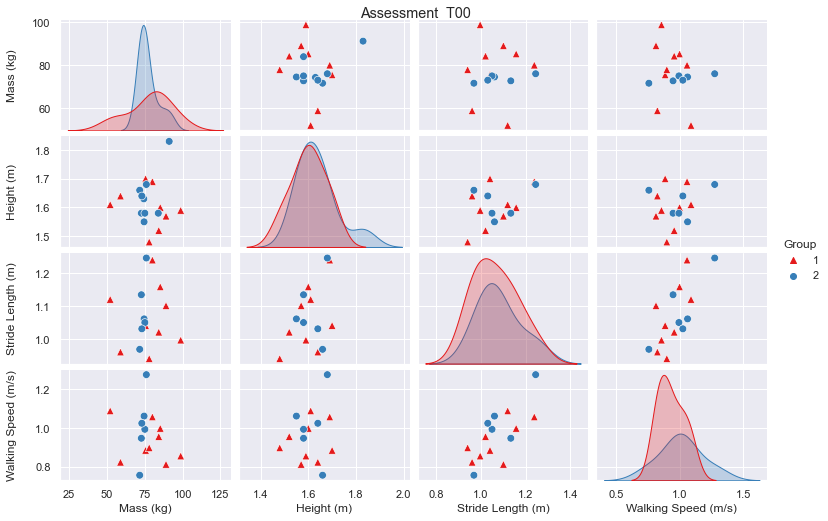

In [12]:
labels = ['Mass (kg)', 'Height (m)', 'Stride Length (m)', 'Walking Speed (m/s)']
g = sns.pairplot(df2[df2['Assessment']=='T00'], vars=['Mass', 'Height',
                                                      'Stride Length', 'Walking Speed'],
                 markers=['^', 'o'], hue='Group', plot_kws={'s':60},
                 height=1.8, aspect=1.5, palette=palette[:2])
axs = g.axes.flatten()
for i in range(len(labels)):
    axs[int(i*len(labels))].set_ylabel(labels[i])
    axs[int(i*len(labels))].yaxis.set_label_coords(-0.25, .5)
    axs[int(i+(len(labels)-1)*len(labels))].set_xlabel(labels[i])
g.fig.suptitle('Assessment  T00', y=1)
plt.show()

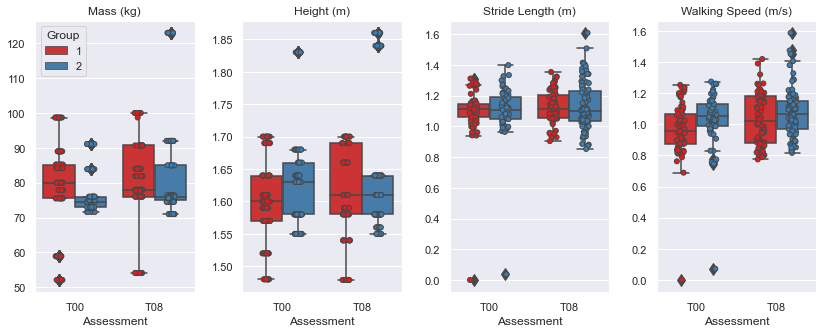

In [15]:
var = ['Mass', 'Height', 'Stride Length', 'Walking Speed']
labels = ['Mass (kg)', 'Height (m)', 'Stride Length (m)', 'Walking Speed (m/s)']
fig, axs = plt.subplots(1, 4, figsize=(14, 5), gridspec_kw={'hspace': .1, 'wspace': .3})
for ax, v, label in zip(axs, var, labels):
    sns.stripplot(x='Assessment', y=v, data=df, ax=ax, hue='Group', jitter=True,
                  edgecolor='gray', linewidth=1, dodge=True, palette=palette[:2])
    sns.boxplot(x='Assessment', y=v, data=df, fliersize=9, ax=ax, hue='Group',
                palette=palette[:2])
    handles, labels = ax.get_legend_handles_labels()
    if v == 'Mass':
        ax.legend(handles[:2], labels[:2], frameon=True, loc='best', title='Group')
    else:
        ax.get_legend().remove()
    ax.set_title(label)
    ax.set_ylabel('')
plt.show()